In [ ]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm.notebook import tqdm
tqdm.pandas()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
HOME = "/drive/My Drive/RISTEK/sunjad/"

In [ ]:
!ls "$HOME"

classes.csv	     period.csv			 user.csv
course_schedule.csv  period.json		 user.json
courses.csv	     Sunjad_EDA.ipynb		 user_schedule.csv
lecturers.csv	     Sunjad_Geo.ipynb		 user_schedule.json
major.csv	     Sunjad_user.ipynb
major.json	     Sunjad_user_schedule.ipynb


In [ ]:
us = pd.read_csv(HOME+"user_schedule.csv")
us

,id_schedule,user_id,name,created_at,deleted
0,6104d2cf8aadd383ec57d3c3,60f4f2b38cd53dc0e3b371ba,212/plan-1,2021-07-31T04:34:23.663Z,False
1,6104d66a8aadd383ec57d3c4,60f58061752be98a2e59f66a,Bismillah Sem 3,2021-07-31T04:49:46.213Z,False
2,6104d8338aadd383ec57d3c8,6104d79c8aadd383ec57d3c7,NaN,2021-07-31T04:57:23.297Z,False
3,6104dbf08aadd383ec57d3c9,6104d7878aadd383ec57d3c5,NaN,2021-07-31T05:13:20.442Z,False
4,6104e4fb8aadd383ec57d3ca,61016eb0737501fdf91e858d,Bismillah SMT 5,2021-07-31T05:51:55.245Z,False
...,...,...,...,...,...
5895,6120cf1ea4fd317044ab8c3c,610909be8aadd383ec57d88a,NaN,2021-08-21T10:02:06.265Z,False
5896,6120eda8a4fd317044ab8c3d,610a24b98aadd383ec57d98e,NaN,2021-08-21T12:12:24.426Z,False
5897,61210e7ba4fd317044ab8c41,6110c7cca4fd317044ab80a4,KULEEYAAAHHH,2021-08-21T14:32:27.012Z,False
5898,61210f66a4fd317044ab8c42,610748f38aadd383ec57d4e7,NaN,2021-08-21T14:36:22.611Z,False


In [ ]:
len(us['id_schedule'].unique())

5900

In [ ]:
u = pd.read_csv(HOME+"user.csv")
u.head(1)

,name,username,npm,batch,user_id,major,last_update_course_at
0,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z


In [ ]:
m = pd.read_csv(HOME+"major.csv")
m.head(1)

,name,kd_org,id
0,Ilmu Komputer (Computer Science),01.00.12.01,60f4f2b38cd53dc0e3b371b9


In [ ]:
df = pd.merge(u, m, how='inner', left_on='major', right_on='id').rename({'name_x': 'name', 'name_y': "major_name", 'id': 'major_id'}, axis=1)
df.head(1)

,name,username,npm,batch,user_id,major,last_update_course_at,major_name,kd_org,major_id
0,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,Ilmu Komputer (Computer Science),01.00.12.01,60f4f2b38cd53dc0e3b371b9


In [ ]:
data = df.groupby(by=['major_id', 'major_name'])[['user_id']].count().reset_index().rename({'user_id': "total_user_id"}, axis=1)
data.head()

,major_id,major_name,total_user_id
0,60f4f2b38cd53dc0e3b371b9,Ilmu Komputer (Computer Science),483
1,60f4f3068cd53dc0e3b371bc,Sistem Informasi (Information System),451
2,60f4f3558cd53dc0e3b371bf,Ilmu Komputer (Computer Science),171
3,60f4f74d8cd53dc0e3b371c6,Ilmu Keperawatan (Nursing Science),55
4,60f4fcfe8cd53dc0e3b371cb,Fisika (Physics),11


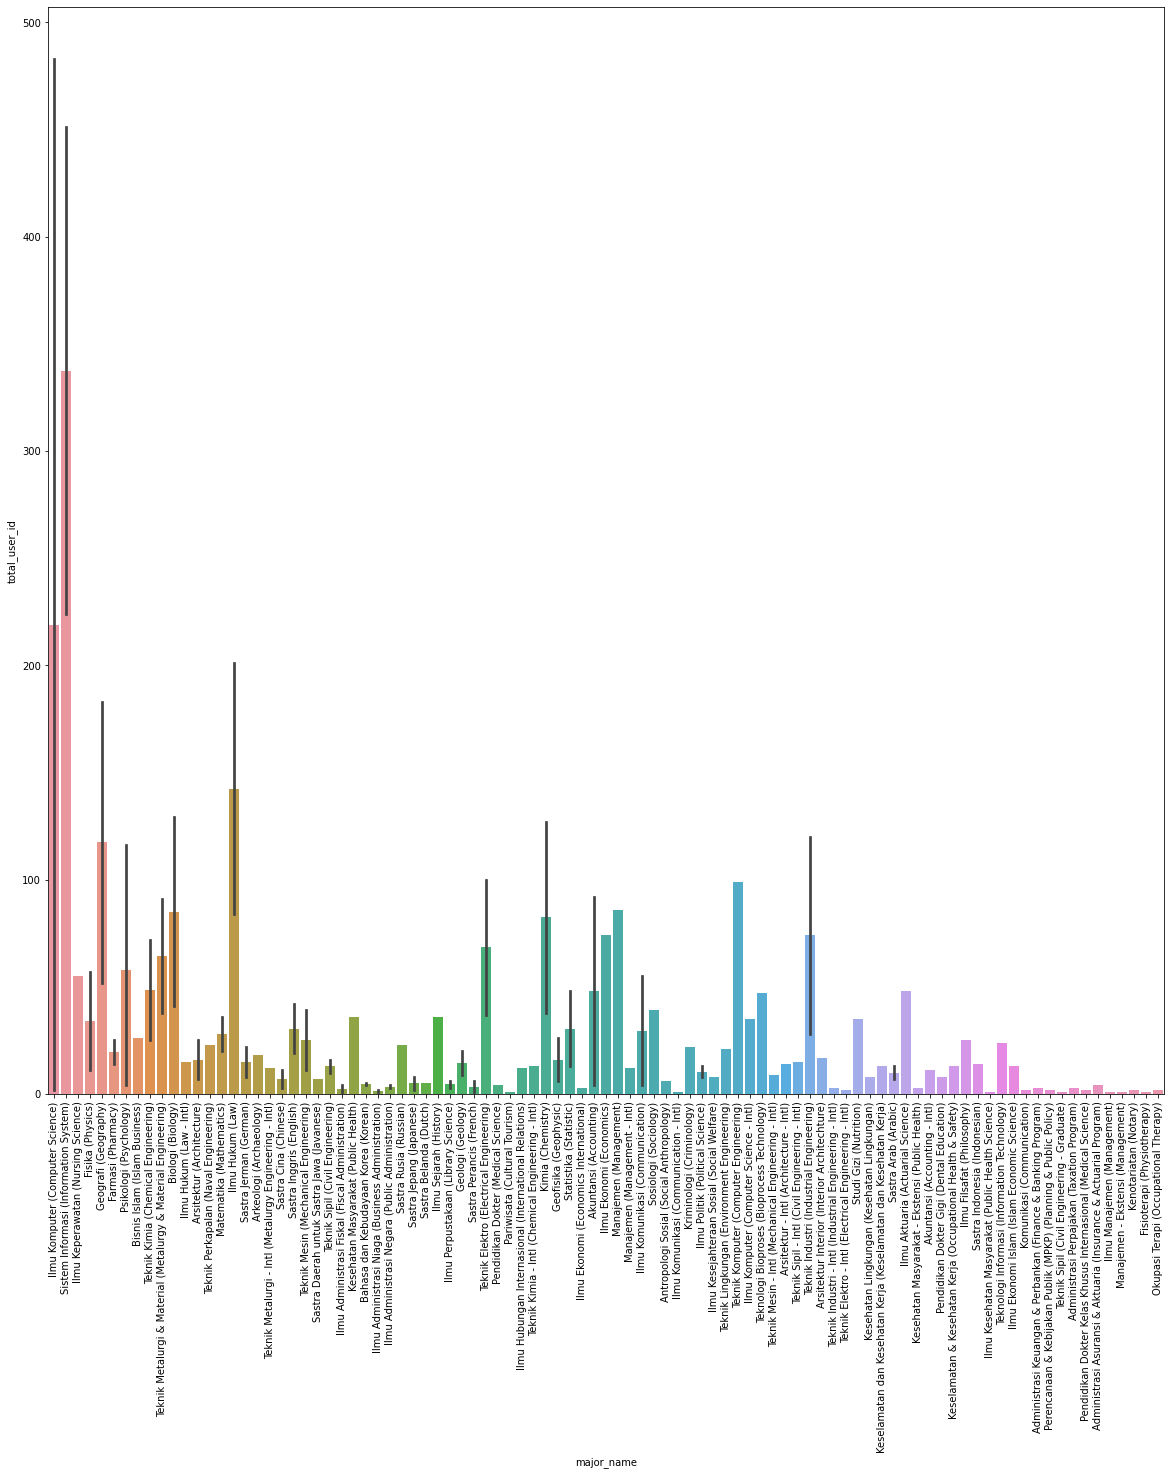

In [ ]:
plt.figure(figsize=(20, 20))
plot = sns.barplot(x=data['major_name'], y=data['total_user_id'])
plot.axes.tick_params(axis='x', rotation=90)